In [9]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
from joblib import dump
from sklearn.ensemble import IsolationForest

# Load the data

In [90]:
X_train = pd.read_csv('./Datasets/train.csv')
X_test = pd.read_csv('./Datasets/test.csv')
X_train.shape

(64227, 2)

# Train the basic classifier

In [20]:
# Base model; without contamination.
clf = IsolationForest(n_estimators = 100, random_state=16).fit(X_train)
clf

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=16, verbose=0, warm_start=False)

In [21]:
predictions = clf.predict(X_train)
predictions

array([-1, -1,  1, ...,  1, -1, -1])

In [42]:
a = np.linspace(-2, 70, 100)
a.ravel()

array([-2.        , -1.27272727, -0.54545455,  0.18181818,  0.90909091,
        1.63636364,  2.36363636,  3.09090909,  3.81818182,  4.54545455,
        5.27272727,  6.        ,  6.72727273,  7.45454545,  8.18181818,
        8.90909091,  9.63636364, 10.36363636, 11.09090909, 11.81818182,
       12.54545455, 13.27272727, 14.        , 14.72727273, 15.45454545,
       16.18181818, 16.90909091, 17.63636364, 18.36363636, 19.09090909,
       19.81818182, 20.54545455, 21.27272727, 22.        , 22.72727273,
       23.45454545, 24.18181818, 24.90909091, 25.63636364, 26.36363636,
       27.09090909, 27.81818182, 28.54545455, 29.27272727, 30.        ,
       30.72727273, 31.45454545, 32.18181818, 32.90909091, 33.63636364,
       34.36363636, 35.09090909, 35.81818182, 36.54545455, 37.27272727,
       38.        , 38.72727273, 39.45454545, 40.18181818, 40.90909091,
       41.63636364, 42.36363636, 43.09090909, 43.81818182, 44.54545455,
       45.27272727, 46.        , 46.72727273, 47.45454545, 48.18

# Visualization

[-2.         -1.27272727 -0.54545455 ... 68.54545455 69.27272727
 70.        ]
(10000,)
-0.371078126851377


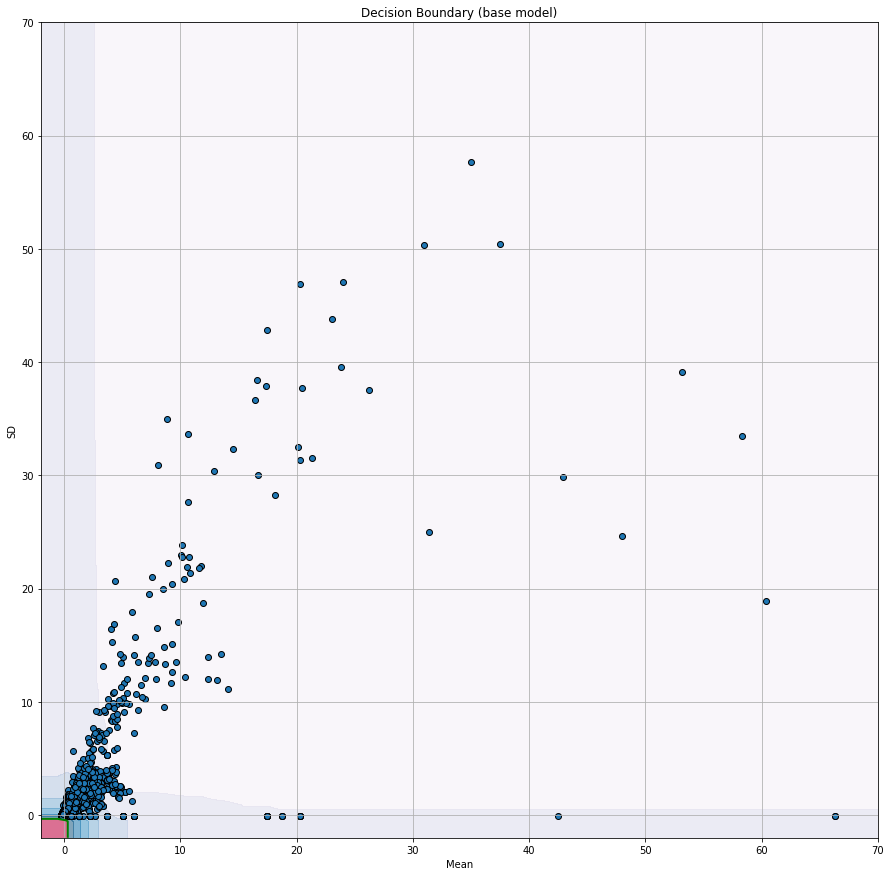

In [89]:
# Plot of the base model's decision frontier.

plt.rcParams['figure.figsize'] = [15, 15]

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
print(xx.ravel())
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
print(Z.min())
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")

# This draws the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draws the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='g')
# This draws the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(X_train.iloc[:, 0],
            X_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [93]:
# With contamination.
clf = IsolationForest(n_estimators = 100, random_state=16, contamination=0.001).fit(X_train)

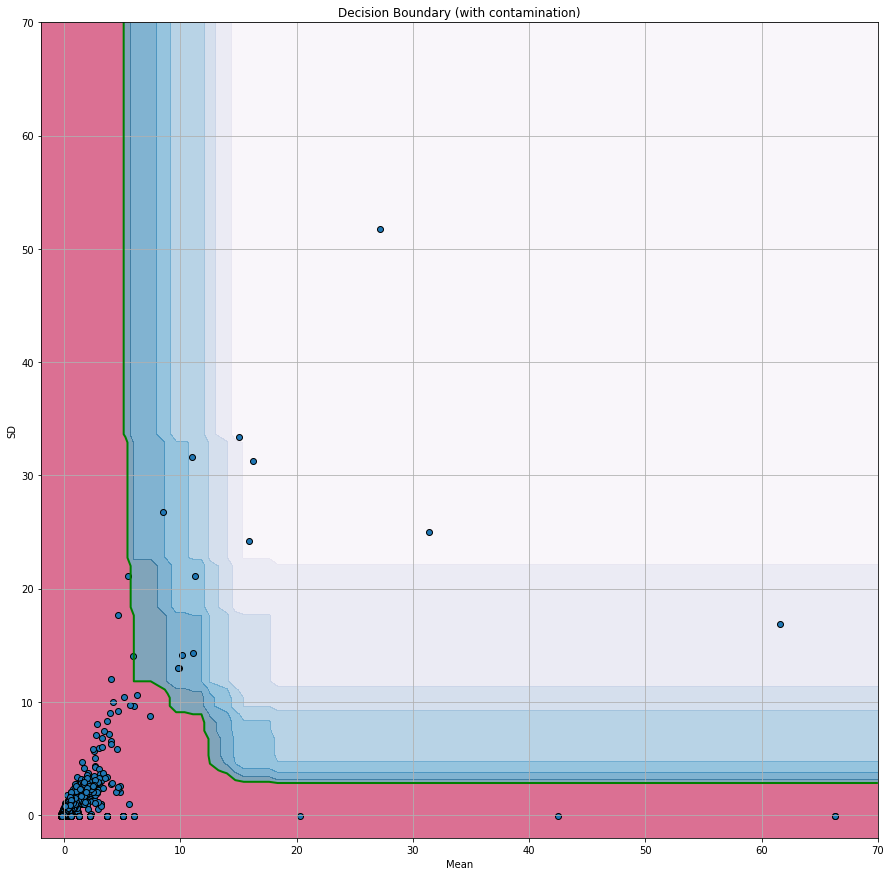

In [105]:
# Plot of the contamination model's decision frontier.
plt.rcParams['figure.figsize'] = [15, 15]

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (with contamination)")
plt.contourf(xx, yy, Z, levels=np.linspace(
    Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='g')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(X_test.iloc[:, 0],
            X_test.iloc[:, 1],
            cmap = matplotlib.colors.ListedColormap(['blue', 'red']), edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [106]:
predictions = clf.predict(X_test)

In [110]:
df_predictions = pd.concat([X_test, pd.Series(predictions)], axis=1)
df_predictions.columns = ['mean', 'sd', 'output']
df_predictions

,mean,sd,output
0,-0.157953,-0.106749,1
1,-0.157953,-0.106749,1
2,-0.157953,-0.106242,1
3,-0.284889,-0.106749,1
4,-0.157953,-0.106242,1
...,...,...,...
16052,-0.157953,-0.106242,1
16053,-0.157953,-0.106242,1
16054,-0.038950,0.020446,1
16055,-0.157953,-0.106242,1


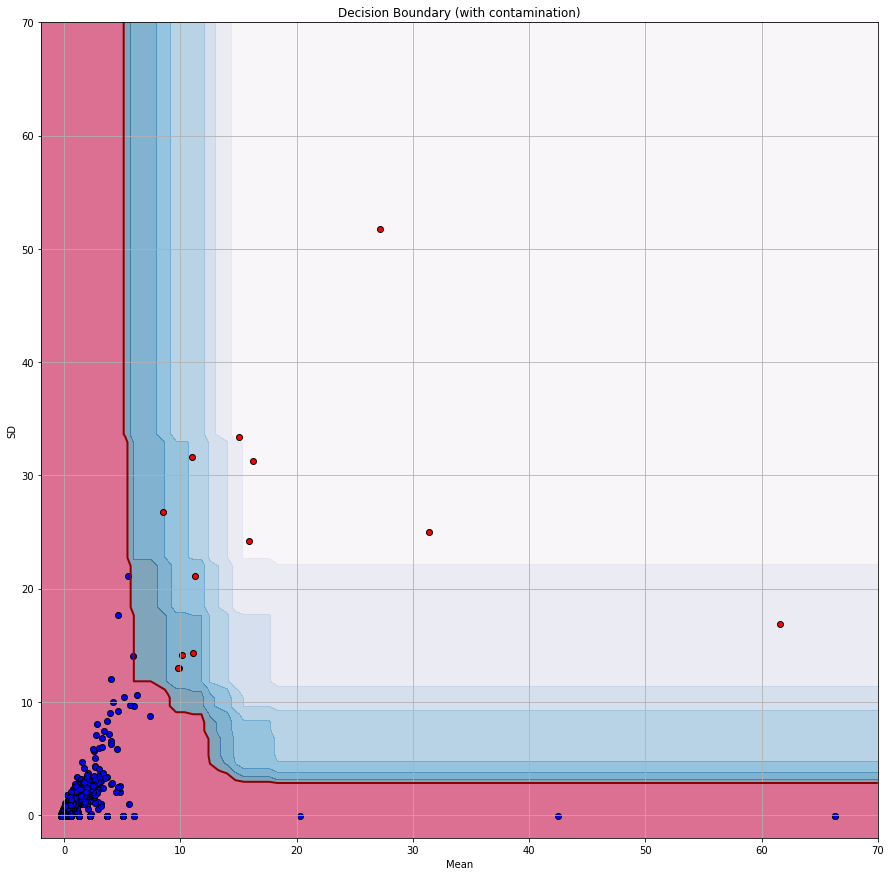

In [111]:
# Plot of the test dataset and the contamination model's decision frontier.
plt.rcParams['figure.figsize'] = [15, 15]

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (with contamination)")
plt.contourf(xx, yy, Z, levels=np.linspace(
    Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# output 1 means normal
plt.scatter(df_predictions[df_predictions['output'] == 1 ].iloc[:, 0],
                 df_predictions[df_predictions['output'] == 1 ].iloc[:, 1],
                 c='blue', edgecolors='k')

# output -1 means abnormal
plt.scatter(df_predictions[df_predictions['output'] == -1 ].iloc[:, 0],
                 df_predictions[df_predictions['output'] == -1 ].iloc[:, 1],
                 c='red', edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [112]:
# Export the model.
dump(clf, 'model.joblib') 

['model.joblib']